## Dataset: Swedish texts published during 2021 about *COVID-19*

###Swedish pipeline optimized for CPU. Components: tok2vec, tagger morphologizer, parser, lemmatizer, ner *`sv_core_news_sm`*: https://spacy.io/models/sv (version: 3.7.0)

**Import Primary Libraries/Packages**

In [18]:
!python -m spacy download sv_core_news_sm  # Download the Swedish language model for spaCy
import pandas as pd
import spacy
from spacy.lang.sv.examples import sentences
import requests
from io import StringIO
import random

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 49.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('sv_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [19]:
# Load the Swedish spaCy model
nlp = spacy.load("sv_core_news_sm")

# Process a sample sentence
doc = nlp(sentences[0])
print(doc.text)
for token in doc:
    print(token.text, token.pos_, token.dep_)

Apple överväger att köpa brittisk startup för 1 miljard dollar.
Apple PROPN nsubj
överväger VERB ROOT
att PART mark
köpa VERB xcomp
brittisk ADJ amod
startup NOUN obj
för ADP case
1 NUM nummod
miljard NOUN obl
dollar VERB obj
. PUNCT punct


In [20]:
# Step 1: Load the CSV file from the URL
url = "https://raw.githubusercontent.com/DimitrisKokkinakis/swedish-notebooks/refs/heads/main/textual-resources/sv_CovidCorpus2.csv"
s = requests.get(url).text
df = pd.read_csv(StringIO(s), sep="\t")

df.head()

,id,date,genre,text
0,1,2021-01-01,NEWS,Den nya virusvarianten i Storbritannien har le...
1,2,2021-01-01,NEWS,Några personer syns framför fyrverkeripjäser. ...
2,3,2021-01-01,NEWS,Under nyårsnatten bröt polisen upp en svartklu...
3,4,2021-01-01,PRDCL,Denna information kommer från boken Vad Läkeme...
4,5,2021-01-02,BLOG,Folkhälsomyndigheten försöker 'skylla' dödstal...


In [21]:
# Step 2: Process the 'text' column using spaCy NLP pipeline
def process_text(text):
    doc = nlp(text)

    # Extract UPOS, XPOS, Dependency parsing, and Named Entities
    upos_tags = [(token.text, token.pos_) for token in doc]  # UPOS (Universal POS tags)
    xpos_tags = [(token.text, token.tag_) for token in doc]  # XPOS (Extended POS tags)
    deps = [(token.text, token.dep_) for token in doc]  # Dependency relations
    ents = [(ent.text, ent.label_) for ent in doc.ents]  # Named Entities

    # Returning a dictionary of processed results
    return {
        "upos_tags": upos_tags,
        "xpos_tags": xpos_tags,
        "deps": deps,
        "entities": ents
    }

In [22]:
# Step 3: Apply processing to each row in 'text' column
# Added a lambda function to check if the value is a string before processing.
# If not a string (e.g., NaN), it returns None.
df['text COPY'] = df['text'].apply(lambda x: process_text(x) if isinstance(x, str) else None)

In [23]:
# Access the 'upos_tags' for the first processed text in the DataFrame
df['text COPY'].iloc[0]['upos_tags']

[('Den', 'DET'),
 ('nya', 'ADJ'),
 ('virusvarianten', 'NOUN'),
 ('i', 'ADP'),
 ('Storbritannien', 'PROPN'),
 ('har', 'AUX'),
 ('lett', 'VERB'),
 ('till', 'ADP'),
 ('stängda', 'ADJ'),
 ('gränser', 'NOUN'),
 ('i', 'ADP'),
 ('omvärlden', 'NOUN'),
 ('.', 'PUNCT'),
 ('Larmet', 'NOUN'),
 ('om', 'ADP'),
 ('den', 'DET'),
 ('nya', 'ADJ'),
 ('brittiska', 'ADJ'),
 ('varianten', 'NOUN'),
 ('av', 'ADP'),
 ('coronavirus', 'NOUN'),
 ('har', 'AUX'),
 ('lett', 'VERB'),
 ('till', 'ADP'),
 ('panik', 'NOUN'),
 ('och', 'CCONJ'),
 ('stängda', 'ADJ'),
 ('gränser', 'NOUN'),
 ('.', 'PUNCT'),
 ('Men', 'CCONJ'),
 ('vissa', 'ADJ'),
 ('experter', 'NOUN'),
 ('varnar', 'NOUN'),
 ('för', 'ADP'),
 ('förhastade', 'ADJ'),
 ('åtgärder', 'NOUN'),
 ('.', 'PUNCT'),
 ('-', 'PUNCT'),
 ('Det', 'PRON'),
 ('finns', 'VERB'),
 ('inget', 'PRON'),
 ('som', 'PRON'),
 ('bevisar', 'VERB'),
 ('ökad', 'ADJ'),
 ('smittsamhet', 'NOUN'),
 (',', 'PUNCT'),
 ('säger', 'VERB'),
 ('virologen', 'NOUN'),
 ('Tomas', 'PROPN'),
 ('Bergström', 'PROPN'

In [24]:
# Step 4: Count occurrences of each part of speech (absolute count)
from collections import Counter
!pip install matplotlib seaborn # install necessary modules
import matplotlib.pyplot as plt # import matplotlib.pyplot as plt
import seaborn as sns

# Flatten the list of UPOS tags for all processed texts
all_upos_tags = [pos for row in df['text COPY'] for tag, pos in row['upos_tags']] if df['text COPY'] is not None else []
upos_counts = Counter(all_upos_tags)

# Step 5: Calculate relative frequency of each part of speech
total_pos = sum(upos_counts.values())
relative_frequencies = {pos: count / total_pos for pos, count in upos_counts.items()}

# Step 6: Combine absolute counts and relative frequencies into annotation strings
annotations = {pos: f"{count} ({freq:.2%})" for pos, (count, freq) in zip(upos_counts.keys(), zip(upos_counts.values(), relative_frequencies.values()))}

# Convert the counts and relative frequencies to a DataFrame
pos_df = pd.DataFrame({
    'Absolute Count': upos_counts.values(),
    'Relative Frequency': relative_frequencies.values()
}, index=upos_counts.keys())

#Ensure the annotations are ordered the same as the DataFrame
annotations = {key: annotations[key] for key in pos_df.index}

In [25]:
all_upos_tags

['DET',
 'ADJ',
 'NOUN',
 'ADP',
 'PROPN',
 'AUX',
 'VERB',
 'ADP',
 'ADJ',
 'NOUN',
 'ADP',
 'NOUN',
 'PUNCT',
 'NOUN',
 'ADP',
 'DET',
 'ADJ',
 'ADJ',
 'NOUN',
 'ADP',
 'NOUN',
 'AUX',
 'VERB',
 'ADP',
 'NOUN',
 'CCONJ',
 'ADJ',
 'NOUN',
 'PUNCT',
 'CCONJ',
 'ADJ',
 'NOUN',
 'NOUN',
 'ADP',
 'ADJ',
 'NOUN',
 'PUNCT',
 'PUNCT',
 'PRON',
 'VERB',
 'PRON',
 'PRON',
 'VERB',
 'ADJ',
 'NOUN',
 'PUNCT',
 'VERB',
 'NOUN',
 'PROPN',
 'PROPN',
 'PUNCT',
 'NOUN',
 'PROPN',
 'AUX',
 'VERB',
 'SCONJ',
 'DET',
 'ADJ',
 'NOUN',
 'AUX',
 'AUX',
 'NOUN',
 'ADV',
 'ADJ',
 'PUNCT',
 'NOUN',
 'PUNCT',
 'VERB',
 'PROPN',
 'SYM',
 'PROPN',
 'ADJ',
 'NOUN',
 'AUX',
 'VERB',
 'NOUN',
 'ADP',
 'PROPN',
 'DET',
 'ADJ',
 'NOUN',
 'PUNCT',
 'NOUN',
 'PUNCT',
 'NOUN',
 'PROPN',
 'SYM',
 'PROPN',
 'NOUN',
 'PROPN',
 'PROPN',
 'NOUN',
 'ADP',
 'ADJ',
 'NOUN',
 'ADP',
 'DET',
 'ADJ',
 'NOUN',
 'PUNCT',
 'PROPN',
 'PUNCT',
 'PROPN',
 'PROPN',
 'SYM',
 'PROPN',
 'NOUN',
 'NOUN',
 'ADJ',
 'VERB',
 'SCONJ',
 'PRON',
 

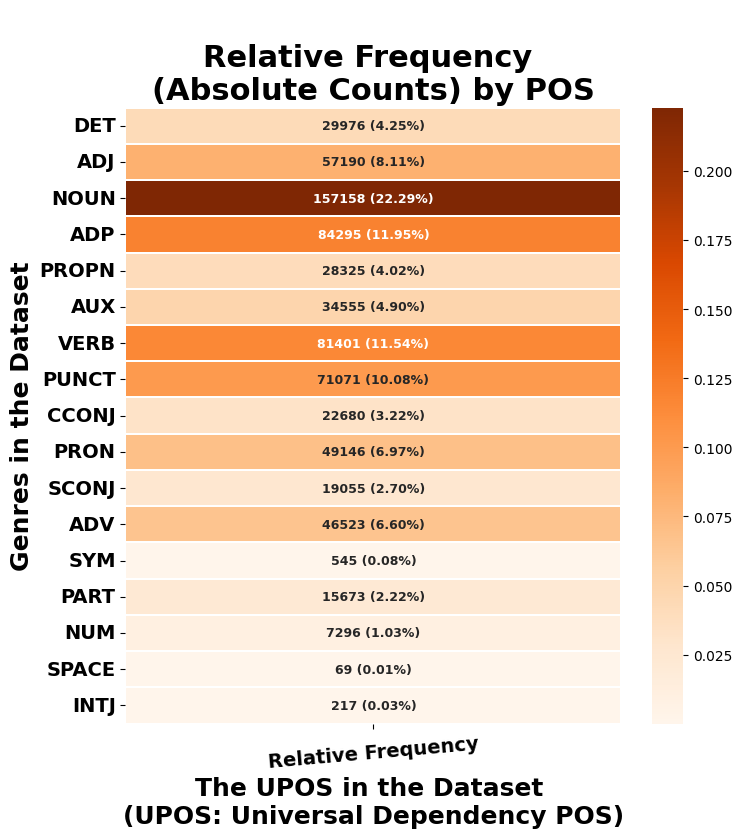

In [26]:
# Step 7: Create a heatmap for part of speech relative frequencies (numeric data)
plt.figure(figsize=(8, 8))  # Larger figure size for better readability

# Use the relative frequency DataFrame for the heatmap data
heatmap_data = pos_df[['Relative Frequency']]

# Create annotations as a 2D array (values)
annotations = heatmap_data.copy()
annotations['Annotations'] = [f"{int(count)} ({freq:.2%})" for count, freq in zip(pos_df['Absolute Count'], pos_df['Relative Frequency'])]
annotations = annotations['Annotations'].values.reshape(-1, 1)  # Reshape to match the heatmap shape

# Create the heatmap
# Added fmt='s' to specify string formatting for annotations
sns.heatmap(heatmap_data, cmap="Oranges", cbar=True, linewidths=0.3, linecolor='white', annot=annotations, fmt='s', annot_kws={"size": 9, "weight": "bold"})

# Update font sizes for title, labels, and ticks
plt.title('\nRelative Frequency \n(Absolute Counts) by POS', fontsize=22, fontweight='bold')
plt.xlabel('The UPOS in the Dataset \n(UPOS: Universal Dependency POS)', fontsize=18, fontweight='bold')
plt.ylabel('Genres in the Dataset', fontsize=18, fontweight='bold')

# Adjust the font size of the x-axis and y-axis ticks
plt.xticks(fontsize=14, fontweight='bold', rotation=5)
plt.yticks(fontsize=14, fontweight='bold')

plt.show()  # Display the heatmap

Distribution of UPOS Tags per Genre (Count (Relative Frequency)): 
UPOS Tag ADJ             ADP              ADV             AUX             CCONJ          DET            INTJ         NOUN             NUM            PART           PRON            PROPN          PUNCT            SCONJ          SPACE        SYM           VERB            
Genre                                                                                                                                                                                                                                                                         
ATHRTS     1462\n(9.05%)   2221\n(13.75%)    902\n(5.58%)    732\n(4.53%)    630\n(3.9%)   714\n(4.42%)   3\n(0.02%)   4138\n(25.61%)   216\n(1.34%)   324\n(2.01%)    852\n(5.27%)   408\n(2.53%)    1476\n(9.14%)   370\n(2.29%)    0\n(0.0%)   14\n(0.09%)   1695\n(10.49%)
BLOG       4254\n(8.49%)    5160\n(10.3%)   3870\n(7.72%)   2381\n(4.75%)  2038\n(4.07%)  2121\n(4.23%)  33\n(0.07%)  10

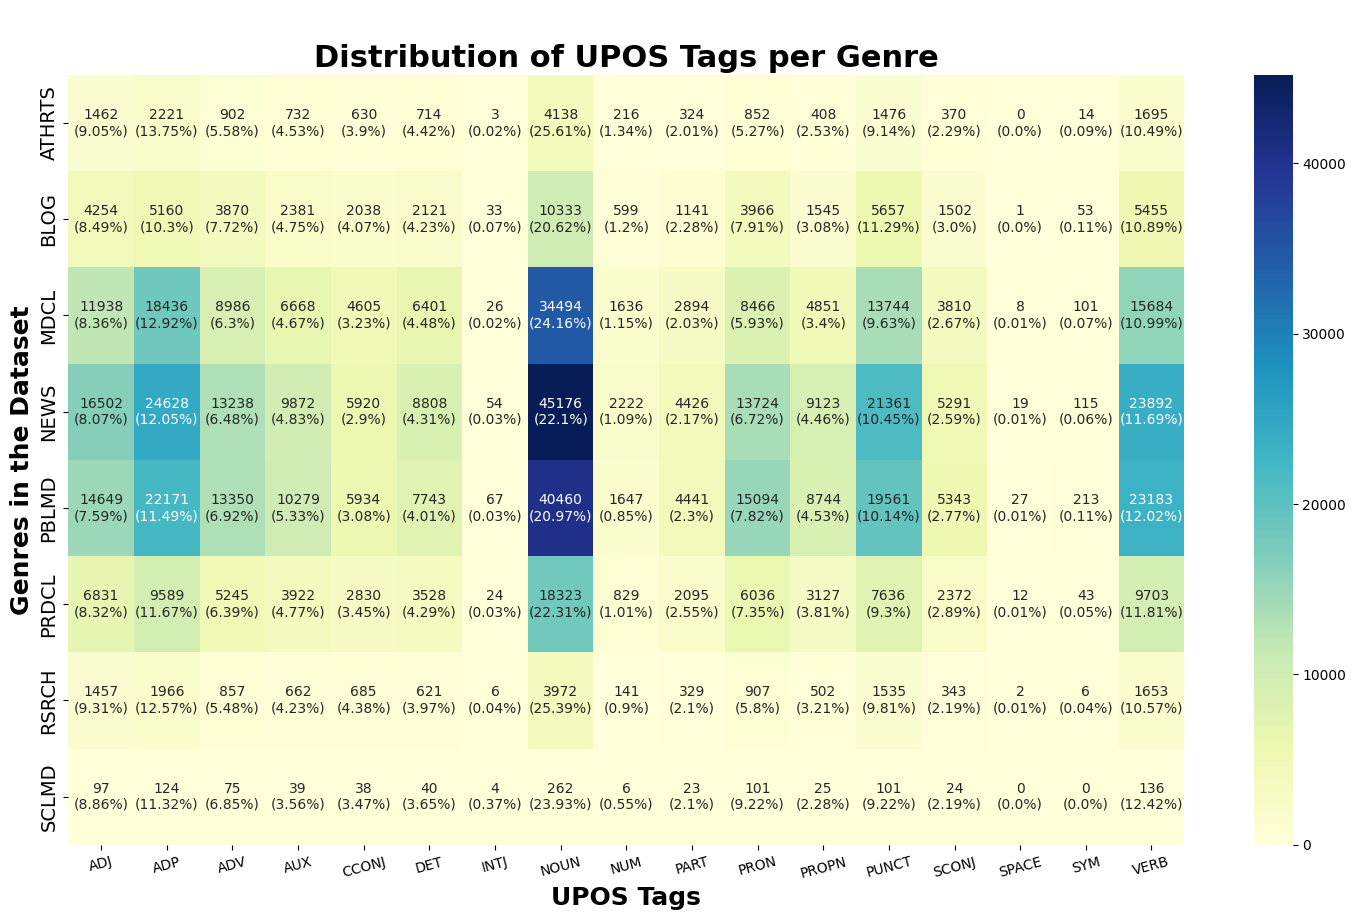

In [27]:
# Creating a distribution of tags per genre
# Step 4: Prepare data for tag distribution per genre
# Create a list to collect all UPOS tags along with their respective genre
tag_distribution = []

for index, row in df.iterrows():
    genre = row['genre'] if 'genre' in df.columns else 'unknown'  # Adjust based on the column name in your DataFrame
    if isinstance(row['text COPY'], dict):
        upos_tags = row['text COPY']['upos_tags']
        for token, pos in upos_tags:
            tag_distribution.append((genre, pos))

# Create a DataFrame from the tag distribution
tag_df = pd.DataFrame(tag_distribution, columns=['Genre', 'UPOS Tag'])

# Step 5: Create a distribution table
tag_count = tag_df.groupby(['Genre', 'UPOS Tag']).size().unstack(fill_value=0)

# Calculate total counts per genre for relative frequency
total_counts_per_genre = tag_count.sum(axis=1)

# Calculate relative frequencies
relative_frequencies = tag_count.div(total_counts_per_genre, axis=0)

# Step 6: Format the output to show both absolute counts and relative frequencies
formatted_count = tag_count.astype(str) + '\n(' + (relative_frequencies * 100).round(2).astype(str) + '%)'

# Display the distribution table with smaller font
print("Distribution of UPOS Tags per Genre (Count (Relative Frequency)): ")
print(formatted_count.to_string(index=True, header=True, justify='left'))

# Visualization (if needed)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 10))  # Larger figure size for better readability

# Create a heatmap for the distribution of UPOS tags with formatted annotations
sns.heatmap(tag_count, annot=formatted_count.values, fmt='', cmap='YlGnBu')

# Update font sizes for title, labels, and ticks
plt.title('\nDistribution of UPOS Tags per Genre', fontsize=22, fontweight='bold')
plt.xlabel('UPOS Tags', fontsize=18, fontweight='bold')
plt.ylabel('Genres in the Dataset', fontsize=18, fontweight='bold')
plt.xticks(fontsize=10, rotation=15)
plt.yticks(fontsize=14)

plt.show()  # Display the heatmap

In [28]:
# Step 4: Filter rows where the token count is between 10 and 20
# Added a lambda function to check if the value is a string before processing. If not a string (e.g., NaN), it returns 0.
df['token_count'] = df['text'].apply(lambda x: len(nlp(x)) if isinstance(x, str) else 0)
filtered_df = df[(df['token_count'] >= 10) & (df['token_count'] <= 15)]

In [29]:
# Step 5: Randomly sample 10 rows or the maximum number of rows if less than 10
sample_size = min(len(filtered_df), 20) # Determine the appropriate sample size
random_sample = filtered_df.sample(n=sample_size)

# Step 6: Display the 20 random rows
random_sample[['date', 'text', 'text COPY', 'genre']] #,'author'

,date,text,text COPY,genre
2159,2021-09-28,Sex månader efter den andra_dosen av Pfizer_va...,"{'upos_tags': [('Sex', 'NUM'), ('månader', 'NO...",PBLMD
2631,2021-12-16,Nu har de första exemplaren av nytrycket av bo...,"{'upos_tags': [('Nu', 'ADV'), ('har', 'VERB'),...",PRDCL
1587,2021-06-19,Oro för dödliga följdeffekten av corona Svampi...,"{'upos_tags': [('Oro', 'NOUN'), ('för', 'ADP')...",NEWS


In [30]:
# Step 7: Display detailed results for 'text COPY' for each row
# For each row, display UPOS, XPOS, dependency parsing, and named entities in a more readable format
for idx, row in random_sample.iterrows():
    print(f"\n\nRow {idx} - Text: {row['text']}\n")

    # UPOS Tags
    print("UPOS Tags:")
    for word, pos in row['text COPY']['upos_tags']:
        print(f"{word}: {pos}")

    # XPOS Tags
    print("\nXPOS Tags:")
    for word, tag in row['text COPY']['xpos_tags']:
        print(f"{word}: {tag}")

    # Dependency Parsing
    print("\nDependency Relations:")
    for word, dep in row['text COPY']['deps']:
        print(f"{word}: {dep}")

    # Named Entities
    print("\nNamed Entities:")
    if row['text COPY']['entities']:
        for entity, label in row['text COPY']['entities']:
            print(f"{entity}: {label}")
    else:
        print("No named entities found.")



Row 2159 - Text: Sex månader efter den andra_dosen av Pfizer_vaccin hade antikroppsnivån minskat med procent.

UPOS Tags:
Sex: NUM
månader: NOUN
efter: ADP
den: DET
andra_dosen: NOUN
av: ADP
Pfizer_vaccin: NOUN
hade: VERB
antikroppsnivån: NOUN
minskat: VERB
med: ADP
procent: NOUN
.: PUNCT

XPOS Tags:
Sex: RG|NOM
månader: NN|UTR|PLU|IND|NOM
efter: PP
den: DT|UTR|SIN|DEF
andra_dosen: NN|UTR|SIN|DEF|NOM
av: PP
Pfizer_vaccin: NN|NEU|SIN|DEF|NOM
hade: VB|PRT|AKT
antikroppsnivån: NN|UTR|SIN|DEF|NOM
minskat: VB|SUP|AKT
med: PP
procent: NN|UTR|SIN|IND|NOM
.: MAD

Dependency Relations:
Sex: nummod
månader: obl
efter: case
den: det
andra_dosen: nmod
av: case
Pfizer_vaccin: nmod
hade: aux
antikroppsnivån: nsubj
minskat: ROOT
med: case
procent: obl
.: punct

Named Entities:
No named entities found.


Row 2631 - Text: Nu har de första exemplaren av nytrycket av boken Corona-PLANdemin kommit.

UPOS Tags:
Nu: ADV
har: VERB
de: DET
första: ADJ
exemplaren: NOUN
av: ADP
nytrycket: NOUN
av: ADP
boken: 

In [31]:
#CONLL format
# ANSI escape codes for colors
RED = "\033[91m"    # Red for nouns (NN)
BLUE = "\033[94m"   # Blue for adjectives (ADJ)
GREEN = "\033[92m"  # Green for verbs (VB)
RESET = "\033[0m"   # Reset color to default

# Initialize an empty list to store CoNLL formatted rows
conll_rows = []

# Iterate through each row in the random_sample DataFrame
for idx, row in random_sample.iterrows():
    text_copy = row['text COPY']

    # Get all necessary tags and entities
    upos_tags = text_copy['upos_tags']
    xpos_tags = text_copy['xpos_tags']
    deps = text_copy['deps']
    entities = text_copy['entities']

    # Iterate through each word for UPOS, XPOS, and Dependency Relations
    for i, (word, _) in enumerate(upos_tags):
        # Get UPOS, XPOS, and Dependency relations
        upos = upos_tags[i][1]
        xpos = xpos_tags[i][1] if i < len(xpos_tags) else "_"
        dep = deps[i][1] if i < len(deps) else "_"

        # Initialize the named entity label
        ne_label = "_"

        # Check for named entities
        for entity, label in entities:
            if entity == word:
                ne_label = label
                break

        # Use ANSI escape codes based on UPOS
        if xpos.startswith("NN"):
            word_colored = f"{RED}{word}{RESET}"  # Red for nouns
        elif xpos.startswith("JJ"):
            word_colored = f"{BLUE}{word}{RESET}"  # Blue for adjectives
        elif xpos.startswith("VB"):
            word_colored = f"{GREEN}{word}{RESET}"  # Green for verbs
        else:
            word_colored = word  # Default color for other words

        # Append the formatted row to conll_rows
        conll_rows.append(f"{i + 1}\t{word_colored}\t{upos}\t{xpos}\t{dep}\t{ne_label}")

# Print the CoNLL formatted output
conll_output = "\n".join(conll_rows)
print(conll_output)

1	Sex	NUM	RG|NOM	nummod	_
2	månader	NOUN	NN|UTR|PLU|IND|NOM	obl	_
3	efter	ADP	PP	case	_
4	den	DET	DT|UTR|SIN|DEF	det	_
5	andra_dosen	NOUN	NN|UTR|SIN|DEF|NOM	nmod	_
6	av	ADP	PP	case	_
7	Pfizer_vaccin	NOUN	NN|NEU|SIN|DEF|NOM	nmod	_
8	hade	VERB	VB|PRT|AKT	aux	_
9	antikroppsnivån	NOUN	NN|UTR|SIN|DEF|NOM	nsubj	_
10	minskat	VERB	VB|SUP|AKT	ROOT	_
11	med	ADP	PP	case	_
12	procent	NOUN	NN|UTR|SIN|IND|NOM	obl	_
13	.	PUNCT	MAD	punct	_
1	Nu	ADV	AB	advmod	_
2	har	VERB	VB|PRS|AKT	aux	_
3	de	DET	DT|UTR/NEU|PLU|DEF	det	_
4	första	ADJ	RO|NOM	amod	_
5	exemplaren	NOUN	NN|UTR|SIN|DEF|NOM	nsubj	_
6	av	ADP	PP	case	_
7	nytrycket	NOUN	NN|NEU|SIN|DEF|NOM	nmod	_
8	av	ADP	PP	case	_
9	boken	NOUN	NN|UTR|SIN|DEF|NOM	nmod	_
10	Corona-PLANdemin	ADV	AB	advcl	_
11	kommit	VERB	VB|SUP|AKT	ROOT	_
12	.	PUNCT	MAD	punct	_
1	Oro	NOUN	NN|UTR|SIN|IND|NOM	ROOT	_
2	för	ADP	PP	case	_
3	dödliga	ADJ	JJ|POS|UTR/NEU|SIN|DEF|NOM	amod	_
4	följdeffekten	NOUN	NN|UTR|SIN|DEF|NOM	obl	_
5	av	ADP	PP	case	_
6	corona	NOUN	NN|UTR|SIN|IND|NOM	nmo

In [32]:
# Step 8: Visualize the dependency tree for random sentences using displacy
print("\n\nDependency Trees for Random Sentences:\n")
import spacy # imports the spacy module
from spacy import displacy # imports displacy from the spacy module
from IPython.display import HTML # imports HTML from IPython.display
for idx, row in random_sample.iterrows():
    doc = nlp(row['text'])  # Re-process the sentence to visualize the dependency tree
    print(f"Visualizing dependency tree for row {idx} - Text: {row['text']}")

    # Display the dependency tree
    html = displacy.render(doc, style="dep", jupyter=True)
    display(HTML(html))



Dependency Trees for Random Sentences:

Visualizing dependency tree for row 2159 - Text: Sex månader efter den andra_dosen av Pfizer_vaccin hade antikroppsnivån minskat med procent.


<IPython.core.display.HTML object>

Visualizing dependency tree for row 2631 - Text: Nu har de första exemplaren av nytrycket av boken Corona-PLANdemin kommit.


<IPython.core.display.HTML object>

Visualizing dependency tree for row 1587 - Text: Oro för dödliga följdeffekten av corona Svampinfektion kan drabba tidigare covidsjuka.


<IPython.core.display.HTML object>

In [33]:
# Step 9: Show the 20 random sentences with colored named entities
# Define colors for each entity type
colors = {
    "LOC": "light blue",    # Location
    "PRS": "light green",   # Person
    "ORG": "light red",     # Organization
    "MISC": "yellow", # Miscellaneous (default to yellow for others)
}

options = {"ents": ["LOC", "PRS", "ORG"], "colors": colors}

# Now display the random 10 rows with colored named entities
print("\n\nNamed Entities with Colored Tags for Random Sentences:\n")

for idx, row in random_sample.iterrows():
    doc = nlp(row['text'])  # Re-process the sentence to visualize named entities

    # Use displacy to display the named entities with custom colors
    html = displacy.render(doc, style="ent", jupyter=True, options=options)

    # Display the colored entities
    print(f"Visualizing named entities for row {idx} - Text: {row['text']}")
    display(HTML(html))



Named Entities with Colored Tags for Random Sentences:



/usr/local/lib/python3.10/dist-packages/spacy/displacy/__init__.py:213: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  warnings.warn(Warnings.W006)


Visualizing named entities for row 2159 - Text: Sex månader efter den andra_dosen av Pfizer_vaccin hade antikroppsnivån minskat med procent.


<IPython.core.display.HTML object>

Visualizing named entities for row 2631 - Text: Nu har de första exemplaren av nytrycket av boken Corona-PLANdemin kommit.


<IPython.core.display.HTML object>

Visualizing named entities for row 1587 - Text: Oro för dödliga följdeffekten av corona Svampinfektion kan drabba tidigare covidsjuka.


<IPython.core.display.HTML object>